In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing

In [3]:
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')

print(dfx.shape)
print(dfy.shape)

(576, 8)
(576, 1)


<AxesSubplot:xlabel='Outcome', ylabel='count'>

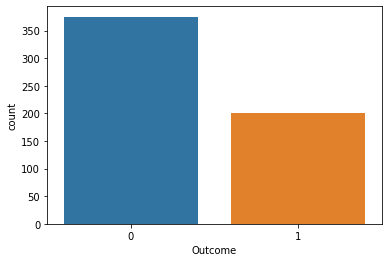

In [4]:
sns.countplot(x = 'Outcome', data = dfy)

In [5]:
# scaler = preprocessing.StandardScaler()
# scaled_df = scaler.fit_transform(dfx)
# dfx = pd.DataFrame(scaled_df, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [6]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [7]:
dfy.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [8]:
X = dfx.values
Y = dfy.values

In [9]:
print(X.shape)
print(Y.shape)

(576, 8)
(576, 1)


In [10]:
Y = Y.reshape((-1, ))

In [11]:
print(Y.shape)

(576,)


In [12]:
print(X)

[[  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  8.    110.     76.    ...  27.8     0.237  58.   ]
 [  7.    147.     76.    ...  39.4     0.257  43.   ]
 ...
 [  2.    122.     60.    ...  29.8     0.717  22.   ]
 [  4.    154.     72.    ...  31.3     0.338  37.   ]
 [  1.     88.     78.    ...  32.      0.365  29.   ]]


In [13]:
print(Y)

[1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 

In [14]:
x_mean = X.mean()
x_std = X.std()

X = (X - x_mean) / x_std

In [15]:
def dist(x1, x2) :
    return np.sqrt(sum((x1-x2)**2))

In [16]:
def knn(X, Y, queryPoint, k = 5) :
    vals = []
    m = X.shape[0] # Total points
    for i in range(m) :
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
    vals = sorted(vals)
    # Nearest/First k points
    vals = vals[:k]
    vals = np.array(vals)
    # print(vals)
    new_vals = np.unique(vals[:,1], return_counts = True)
    # print(new_vals)
    max_freq_index = new_vals[1].argmax()
    pred = new_vals[0][max_freq_index]
    return pred

In [17]:
dftrain = pd.read_csv('Diabetes_Xtest.csv')

In [18]:
# scaler = preprocessing.StandardScaler()
# scaled_df = scaler.fit_transform(dftrain)
# dftrain = pd.DataFrame(scaled_df, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [19]:
dftrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [20]:
X_test = dftrain.values

In [21]:
X_test.shape

(192, 8)

In [22]:
X_test = (X_test - x_mean) / x_std

In [23]:
pred = []

In [24]:
total_cases = X_test.shape[0]

for i in range(total_cases) :
    pred.append(int(knn(X, Y, X_test[i], 17)))

In [25]:
print(pred)

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]


In [26]:
predictions = np.array(pred)

In [27]:
print(predictions.shape)

(192,)


In [28]:
df_test = pd.DataFrame(predictions, dtype = 'uint8', columns = ['Outcome'])

In [29]:
df_test.head()

,Outcome
0,1
1,0
2,0
3,0
4,0


In [30]:
df_test.to_csv('test_answers.csv', index = False)

In [31]:
split = int(0.8 * X.shape[0])
print(split)

460


In [32]:
x_train = X[:split, :]
y_train = Y[:split]

x_test = X[split:, :]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(460, 8) (460,)
(116, 8) (116,)


In [33]:
total_cases = x_test.shape[0]
correct_pred2 = 0

for i in range(total_cases) :
    pred = int(knn(X, Y, x_test[i], 10))
    actual = y_test[i]
    if pred == actual :
        correct_pred2 += 1

print(correct_pred2 * 100 / total_cases)

75.86206896551724


In [34]:
for k in range(1, 100, 2) :
    total_cases = x_test.shape[0]
    correct_pred2 = 0

    for i in range(total_cases) :
        pred = int(knn(X, Y, x_test[i], k))
        actual = y_test[i]
        if pred == actual :
            correct_pred2 += 1

    print(k, correct_pred2 * 100 / total_cases)

1 100.0
3 77.58620689655173
5 75.86206896551724
7 75.86206896551724
9 75.0
11 77.58620689655173
13 79.3103448275862
15 79.3103448275862
17 79.3103448275862
19 77.58620689655173
21 76.72413793103448
23 74.13793103448276
25 72.41379310344827
27 71.55172413793103
29 73.27586206896552
31 73.27586206896552
33 68.10344827586206
35 71.55172413793103
37 71.55172413793103
39 71.55172413793103
41 71.55172413793103
43 71.55172413793103
45 71.55172413793103
47 73.27586206896552
49 70.6896551724138
51 69.82758620689656
53 68.96551724137932
55 68.96551724137932
57 68.10344827586206
59 68.96551724137932
61 69.82758620689656
63 68.96551724137932
65 69.82758620689656
67 70.6896551724138
69 69.82758620689656
71 69.82758620689656
73 68.10344827586206
75 68.10344827586206
77 70.6896551724138
79 68.96551724137932
81 69.82758620689656
83 68.10344827586206
85 70.6896551724138
87 69.82758620689656
89 69.82758620689656
91 69.82758620689656
93 69.82758620689656
95 70.6896551724138
97 70.6896551724138
99 70.6896

In [35]:
for k in range(1, 100, 2) :
    total_cases = x_test.shape[0]
    correct_pred2 = 0

    for i in range(total_cases) :
        pred = int(knn(X, Y, x_test[i], k))
        actual = y_test[i]
        if pred == actual :
            correct_pred2 += 1

    print(k, correct_pred2 * 100 / total_cases)

1 100.0
3 77.58620689655173
5 75.86206896551724
7 75.86206896551724
9 75.0
11 77.58620689655173
13 79.3103448275862
15 79.3103448275862
17 79.3103448275862
19 77.58620689655173
21 76.72413793103448
23 74.13793103448276
25 72.41379310344827
27 71.55172413793103
29 73.27586206896552
31 73.27586206896552
33 68.10344827586206
35 71.55172413793103
37 71.55172413793103
39 71.55172413793103
41 71.55172413793103
43 71.55172413793103
45 71.55172413793103
47 73.27586206896552
49 70.6896551724138
51 69.82758620689656
53 68.96551724137932
55 68.96551724137932
57 68.10344827586206
59 68.96551724137932
61 69.82758620689656
63 68.96551724137932
65 69.82758620689656
67 70.6896551724138
69 69.82758620689656
71 69.82758620689656
73 68.10344827586206
75 68.10344827586206
77 70.6896551724138
79 68.96551724137932
81 69.82758620689656
83 68.10344827586206
85 70.6896551724138
87 69.82758620689656
89 69.82758620689656
91 69.82758620689656
93 69.82758620689656
95 70.6896551724138
97 70.6896551724138
99 70.6896